In [8]:
pip install numpy

**Import Required Libraries**


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

**load and Explore Data**


In [5]:
df=pd.read_csv('/content/House Price Prediction Dataset.csv')

**Display Rows of Dataset**

In [6]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [7]:
df.shape

(2000, 10)

**The Describe() function**

In [9]:
 df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [10]:
df.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [12]:
df["Price"].unique()

array([149919, 424998, 266746, ..., 476925, 161119, 482525])

In [19]:
df["Bathrooms"].unique()

array([4, 2, 1, 3])

In [21]:
df["Price"].unique().sum()

1074394488

**Check for infinite values and replace them with NaN**

In [23]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

**Drop rows with NaN values**

In [26]:
df.dropna(subset=['Price'], inplace=True)

**set the aesthetic style of the plots**


In [27]:
sns.set_style("whitegrid")

**Scatter Plot of price vs Area **

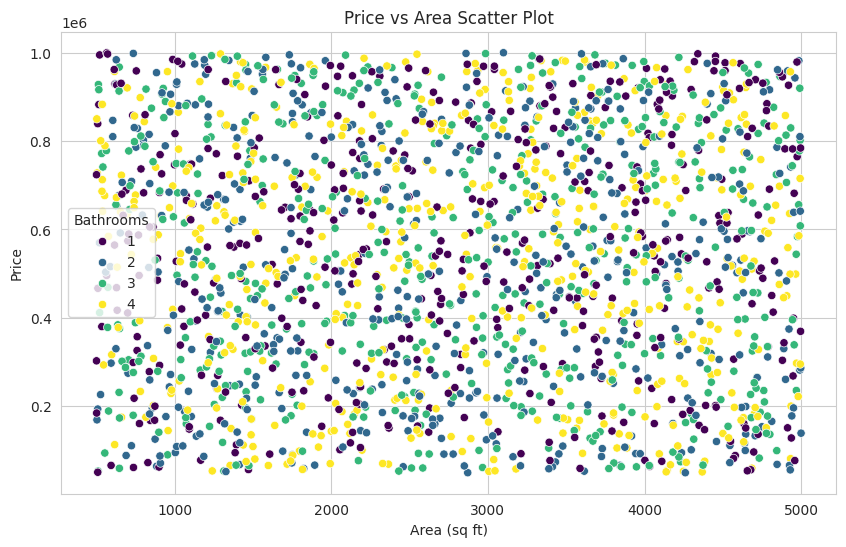

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Price', data=df, hue='Bathrooms',palette='viridis')
plt.title('Price vs Area Scatter Plot')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend(title='Bathrooms')
plt.show()

**Distribution Plot of Price**

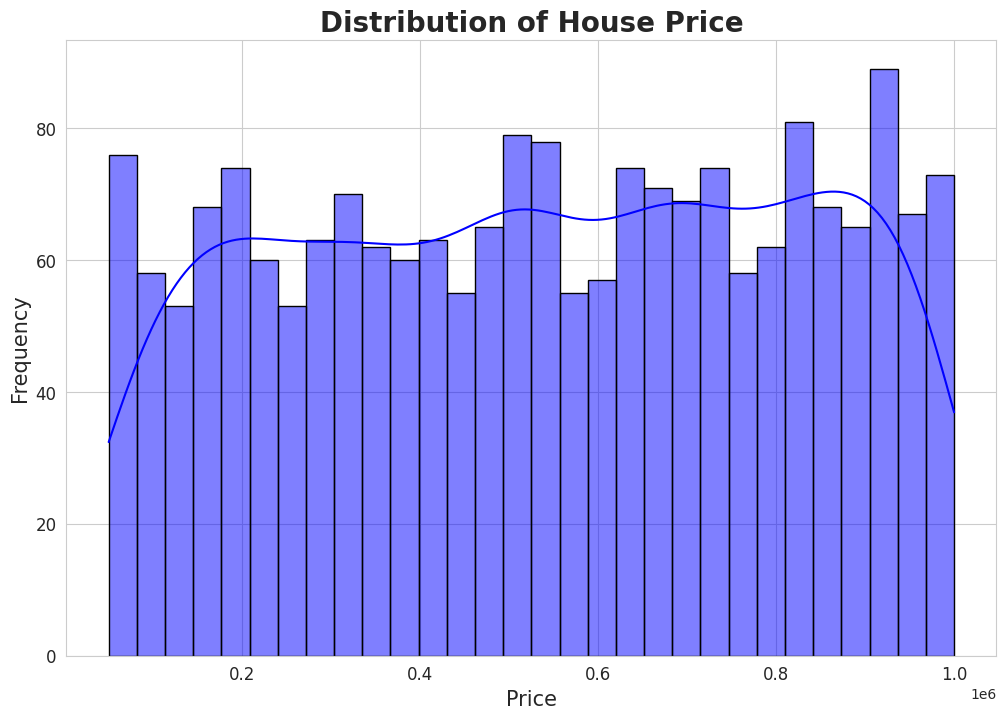

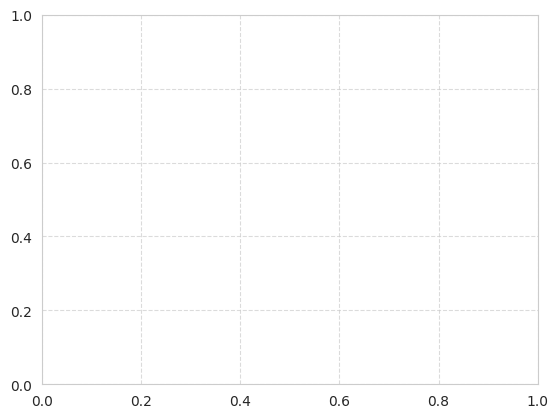

In [29]:
plt.figure(figsize=(12,8))
sns.histplot(df['Price'], bins=30, kde=True, color='blue',edgecolor='black')
plt.title('Distribution of House Price',fontsize=20, weight="bold")
plt.xlabel('Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

plt.grid(True, linestyle='--',alpha=0.7)
plt.show()

**Count Plot of Bedrooms**

<ipython-input-30-c2f5778d64f5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Bedrooms', data=df, palette='viridis')


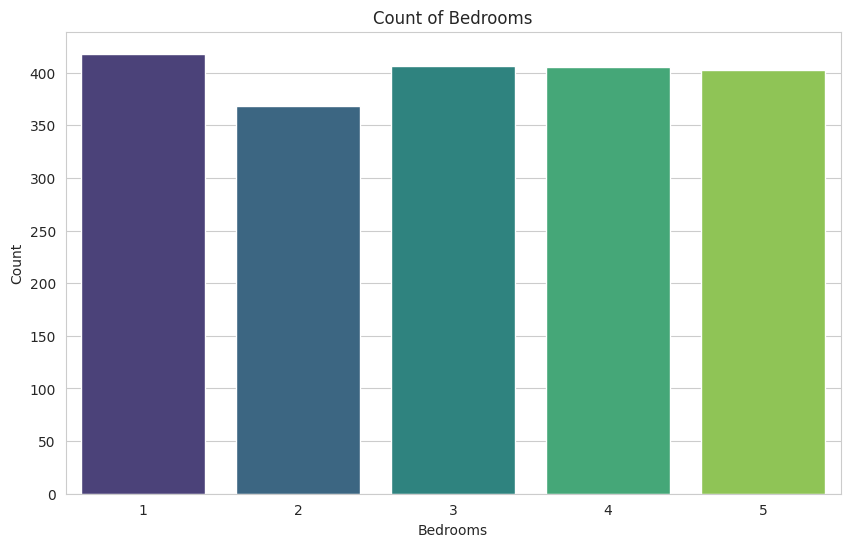

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x='Bedrooms', data=df, palette='viridis')
plt.title('Count of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()


Selecting relevant columns

In [32]:
df = df[['Price', 'Area', 'Bedrooms', 'Bathrooms']]

creating independent and Dependent variables

In [34]:
x = df[['Area', 'Bedrooms', 'Bathrooms']]  # Use a list of column names
y = df['Price']

In [35]:
x.shape

(2000, 3)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression # Import the LinearRegression class
# ... rest of the code ...

model = LinearRegression() # Now you can create an instance

In [39]:
model.fit(x_train, y_train)

LinearRegression()

In [40]:
y_pred=model.predict(x_test)
y_pred

array([522171.74062846, 551143.21917408, 522026.6322543 , 551321.92605739,
       541453.78898837, 551150.95691147, 521974.14982511, 521920.14801541,
       541529.06712945, 541346.15983479, 541427.92821661, 551183.77540854,
       531590.03358659, 531705.76538017, 521863.38171934, 551282.61253798,
       551019.67096917, 531635.83256513, 531825.98142297, 541623.80403872,
       541436.89193343, 522039.70336371, 521790.20737013, 551033.40994549,
       531786.95413223, 531502.63365006, 541598.61352466, 531739.62860077,
       531842.48010406, 522025.38475764, 521772.26559166, 522080.91312026,
       551411.6086509 , 541500.62790883, 541442.43286019, 521797.74233439,
       541576.19227859, 550985.32591917, 521819.30250364, 541405.98879992,
       521856.12820214, 551275.84563179, 551209.34038842, 531604.62646732,
       541582.20068992, 521865.19450093, 531798.01925013, 541392.34523316,
       521763.68112227, 531518.66484657, 521783.14228125, 531606.63484964,
       541360.28044934, 5

In [41]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [42]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 78440549944.81049
R-squared: -0.008248471565956539


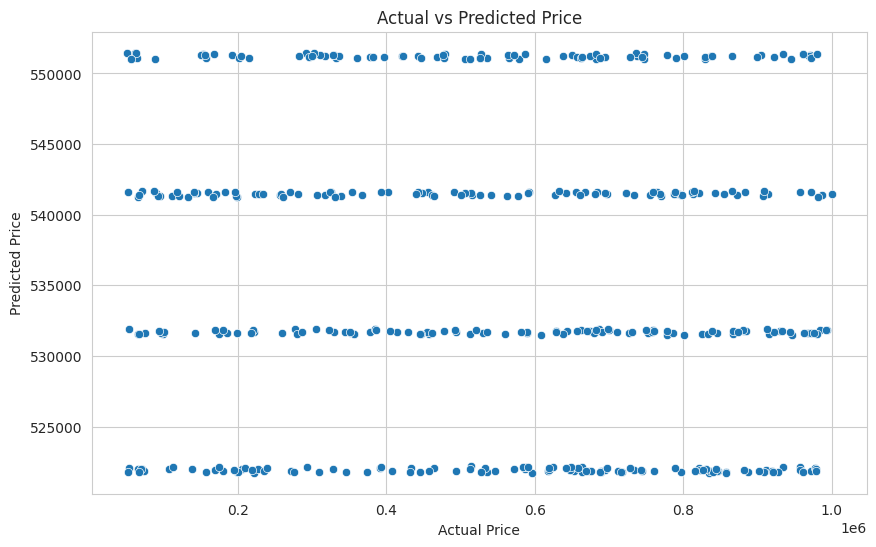

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

In [44]:
unseen_data = pd.DataFrame({'Area': [1500], 'Bedrooms': [3], 'Bathrooms': [2]})
predicited_price = model.predict(unseen_data)
print(f"Predicted Price for Unseen Data: {predicited_price[0]}")

Predicted Price for Unseen Data: 541581.823833297
